# CSE 840 Mini-Project: Analysis of Network Data (Total = 40 points)

### Due date: December 12, 2022 (before midnight) 

For this project, you will be using a social network dataset created from the George R. R. Martin's "A Song of Ice and Fire" book series. The nodes in the network are characters in the book series, with an edge created if two characters appeared within 15 words of one another in one of the books. The weight of the edge is given by their frequency of co-occurrence. For more information, you should refer to the original data source located at https://github.com/mathbeveridge/asoiaf. 

The objective of this project is for you to apply some of the linear algebra and probability methods described in the class to analyze the network data. You are allowed to use the standard python library along with matplotlib, pandas, and numpy libraries to implement the code. No other library functions are allowed (with the exception of pyvis and networkx for the network visualization part only). You must use the Jupyter notebook template provided to write your program. Rename the notebook as **project_yourlastname.ipynb** and submit it to D2L along with other deliverables specified below. 

### A. DATA CREATION

**Step 1:** Download the *asoiaf-all-edges.csv* file from D2L and store it in the same folder as the working directory for the project.  

**Step 2 [6 points]:** Write a data loader function that takes 3 input parameters: *inputFile* and *min_weight* and performs the following tasks: 

- Load the input file into a pandas dataframe object name *edges*. 
- Filter out all the edges whose weights are less than the min_weight threshold. In other words, keep only those edges whose weights are greater than or equal to the min_weight.
- Filter out all the nodes that do not have an edge (after removing the low weight edges). 

The function should return the following 2 pandas DataFrame objects:
- *edges*, which contains 3 columns: Source, Target, and weight
- *nodes*, which contains only 1 column: Name (name of the character)

In [ ]:
import pandas as pd
import numpy as np

def dataLoader(inputFile, min_weight):
    """
        This function will load the social network data from the inputFile and create a set of nodes and edges, 
        stored as pandas DataFrame objects. The function also takes a min_weight threshold to filter out edges
        that have weights below the threshold. Only nodes that have at least one surviving edge (after filtering)
        are returned as the output. 
        
        The schema of the dataframe objects are as follows:
            nodes: Name (string) - dataframe must be sorted in alphabetical order of the character name
            edges: Source, Target, and weight - corresponding to the same 3 columns in the original input file.
            
        Note that you should also drop the 'Type' and 'id' columns from the input file.
        
        Suggestion: You should open the asoiaf-all-edges.csv file first to view how the input file is structured. 
    """
    edges = pd.read_csv(inputFile)
    edges = pd.DataFrame(edges)
    edges.drop(edges[edges['weight'] < min_weight].index, inplace = True)
    edges = edges.drop(['Type','id'], axis=1)
    edges = edges.reset_index(level=0)

    l1 = list(edges.Source.unique())
    l2 = list(edges.Target.unique())
    l3 = l1 + l2
    res = [*set(l3)]
    nodes = pd.DataFrame (res, columns = ['Name'])
    nodes = nodes.sort_values('Name') #you can change this
    nodes = nodes.reset_index(level=0)
    return nodes, edges
    
# Execute the dataLoader function to extract only those nodes that have at least 1 edge whose weight >= 20
nodes, edges = dataLoader('/content/sample_data/asoiaf-all-edges.csv', 20)

print(nodes, edges)

     index                              Name
0       39  Aegon-Targaryen-(son-of-Rhaegar)
1       66   Aemon-Targaryen-(Maester-Aemon)
2       92                     Aeron-Greyjoy
3       61                Aerys-II-Targaryen
4       80                              Aggo
..     ...                               ...
159     30                       Walder-Frey
160    140                    Wyman-Manderly
161     11                  Xaro-Xhoan-Daxos
162     75                           Ygritte
163    104                             Yoren

[164 rows x 2 columns]      index                            Source            Target  weight
0       35  Aegon-Targaryen-(son-of-Rhaegar)  Tyrion-Lannister      23
1       46   Aemon-Targaryen-(Maester-Aemon)            Clydas      33
2       53   Aemon-Targaryen-(Maester-Aemon)             Gilly      20
3       57   Aemon-Targaryen-(Maester-Aemon)      Jeor-Mormont      25
4       58   Aemon-Targaryen-(Maester-Aemon)          Jon-Snow     110
..     ...

**(a)** Display the nodes DataFrame. Make sure the nodes are ordered alphabetically in terms of their Name column and the number of rows in the table matches the min_weight threshold used. See the format of the dataframe schema given below.

In [ ]:
nodes

,Name
0,Aegon-Targaryen-(son-of-Rhaegar)
1,Aemon-Targaryen-(Maester-Aemon)
2,Aeron-Greyjoy
3,Aerys-II-Targaryen
4,Aggo
...,...
159,Walder-Frey
160,Wyman-Manderly
161,Xaro-Xhoan-Daxos
162,Ygritte


**(b)** Display the edges DataFrame object. Make sure it has only 3 columns: Source, Target, and weight. The number of rows in the table must match the threshold you use. See the format of the dataframe schema given below.

In [ ]:
edges.drop('index',axis=1)

,Source,Target,weight
0,Aegon-Targaryen-(son-of-Rhaegar),Tyrion-Lannister,23
1,Aemon-Targaryen-(Maester-Aemon),Clydas,33
2,Aemon-Targaryen-(Maester-Aemon),Gilly,20
3,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,25
4,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,110
...,...,...,...
359,Stannis-Baratheon,Tyrion-Lannister,52
360,Stannis-Baratheon,Tywin-Lannister,30
361,Tommen-Baratheon,Tyrion-Lannister,26
362,Tyrion-Lannister,Tywin-Lannister,117


In [ ]:
edges = edges.drop('index',axis=1)

## B. NETWORK VISUALIZATION

In this step, you will visualize the resulting network created. Use the networkx and pyvis libraries for the network visualization. Do not use these libraries for other remaining parts of the project (except when visualizing the network). You may refer to the tutorial given at https://pyvis.readthedocs.io/en/latest/tutorial.html on how to create the graph and network object for visualization. 


**Step 3 [4 points].** Write the code to visualize the edges DataFrame object you have created. Make sure the graph is embedded in the notework by setting the option notebook=True when invoking the Network() constructor function.

*Hint:* You may use the following functions in pyvis and networkx to implement this step:

- from_pandas_edgelist() to convert the edges pandas DataFrame object into networkx graph object
- from_nx() to convert the networkx graph object into a pyvis network object.
- show() to display the network using pyvis.

For more information, see the documentation below

- https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html
- https://pyvis.readthedocs.io/en/latest/documentation.html (for information about from_nx and show functions)

In [ ]:
!pip install pyvis

In [ ]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height='750px', width='100%', notebook=True)

edges.head()

sources = edges['Source']
targets = edges['Target']
weights = edges['weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()  #dictionary mapping 

# add neighbor data 
for node in got_net.nodes:
    node['title'] += ' Neighbors: ' + ''.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])

got_net.show('gameofthrones.html')

## C. DATA EXPLORATION 

**Step 4 [6 points].** Create a 2-dimensional (dense) numpy array called *adjmatrix* to store the adjacency matrix associated with the network. If there are N nodes in the *nodes* Dataframe object, the numpy array object must be of size N x N. Each (i,j)-th entry of the adjacency matrix must correspond to the weight column of the *edges* DataFrame object. Since the graph is undirected, **its adjacency matrix must be symmetric.** When mapping the edges to the adjacency matrix, make sure the row and column id of the nodes match the row ids of the *nodes* Dataframe object created in Step 1. For example, if *Aegon-Targaryen-(son-of-Rhaegar)* is the first node in the nodes Dataframe, then it should be mapped to the first row and first column of the adjacency matrix. Similarly, if *Yoren* is the last row of the *nodes* Dataframe object, it should be mapped to the last row (and column) of the adjacency matrix. 

Save the resulting N x N adjacency matrix into a csv file named *adjmatrix.csv*. You may use numpy's savetxt() function to do this. **Make sure you submit the csv file as part of your project deliverables**.

In [ ]:
import numpy as np

def getAdjacency(nodes, edges, filename):
    """
        This function takes 3 input parameters: the nodes and edges created by the DataLoader() function as well as the
        output filename to store the adjacency matrix created. If there are N unique nodes in the edges DataFrame, the output
        of the function would be a 2-dimensional numpy array of size N x N. Make sure the adjacency matrix created
        satisfies the following:
        
        - The ordering of the rows and columns in the adjacency matrix matches the ordering in the nodes DataFrame object.
        - The matrix must be symmetric. For example, if adjmatrix(25,28) = 23, then adjmatrix(28, 25) = 23.
        
        Save the adjacency matrix created into the output file.
    """

    N = len(nodes)
    adjmatrix = np.zeros((N, N)) # weight will be zero at the begining
    for idx, row in edges.iterrows():
        t = row.Target
        s = row.Source
        r = nodes[nodes["Name"]==t].index.values
        c = nodes[nodes["Name"]==s].index.values
        adjmatrix[r,c] += row.weight
        adjmatrix[c,r] += row.weight
    
    #np.savetxt("adjmatrix.csv", adjmatrix.astype(int), fmt='%i', delimiter=',')
    return adjmatrix

# Code to invoke the getAdjacency matrix function and display its submatrix.
adjmatrix = getAdjacency(nodes, edges, 'adjmatrix.csv')
adjmatrix[25:35,25:35]

array([[ 0.,  0.,  0., 23.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 29.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.],
       [23.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 65.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 65.,  0.]])

In [ ]:
import numpy as np
import csv


def getAdjacency(nodes, edges, filename):
    """
        This function takes 3 input parameters: the nodes and edges created by the DataLoader() function as well as the
        output filename to store the adjacency matrix created. If there are N unique nodes in the edges DataFrame, the output
        of the function would be a 2-dimensional numpy array of size N x N. Make sure the adjacency matrix created
        satisfies the following:
        
        - The ordering of the rows and columns in the adjacency matrix matches the ordering in the nodes DataFrame object.
        - The matrix must be symmetric. For example, if adjmatrix(25,28) = 23, then adjmatrix(28, 25) = 23.
        
        Save the adjacency matrix created into the output file.
    """
    
    adj = [[0 for _ in range(len(nodes))] for _ in range(len(nodes))]
    edges = edges.values.tolist()
    print('edges', edges)
    #nodes = nodes.sort_values('Name')
    nodes = nodes.values.tolist()
    print('nodes', nodes)
    src, target = 0,0
    for i in range(len(edges)):
      for j in range(len(nodes)):
        if nodes[j][1] == edges[i][0]: #same source index
          src = j
          print('src',src)
        if nodes[j][1] == edges[i][1]: #same target index
          target = j
          print('target',target)
      adj[src][target] = edges[i][2]
      adj[target][src] = edges[i][2]
      with open(filename, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(adj)

    return adj


# Code to invoke the getAdjacency matrix function and display its submatrix.
#nodes, edges = dataLoader('asoiaf-all-edges.csv', 20)
adj = getAdjacency(nodes, edges, 'adjmatrix.csv')
adjmatrix=np.array(adj)
adjmatrix[25:35,25:35]

edges [['Aegon-Targaryen-(son-of-Rhaegar)', 'Tyrion-Lannister', 23], ['Aemon-Targaryen-(Maester-Aemon)', 'Clydas', 33], ['Aemon-Targaryen-(Maester-Aemon)', 'Gilly', 20], ['Aemon-Targaryen-(Maester-Aemon)', 'Jeor-Mormont', 25], ['Aemon-Targaryen-(Maester-Aemon)', 'Jon-Snow', 110], ['Aemon-Targaryen-(Maester-Aemon)', 'Samwell-Tarly', 99], ['Aeron-Greyjoy', 'Euron-Greyjoy', 27], ['Aeron-Greyjoy', 'Theon-Greyjoy', 20], ['Aeron-Greyjoy', 'Victarion-Greyjoy', 20], ['Aerys-II-Targaryen', 'Jaime-Lannister', 37], ['Aerys-II-Targaryen', 'Robert-Baratheon', 35], ['Aerys-II-Targaryen', 'Tywin-Lannister', 26], ['Aggo', 'Daenerys-Targaryen', 30], ['Aggo', 'Jhogo', 26], ['Aggo', 'Rakharo', 23], ['Alliser-Thorne', 'Jon-Snow', 63], ['Anguy', 'Lem', 22], ['Archibald-Yronwood', 'Quentyn-Martell', 21], ['Areo-Hotah', 'Arianne-Martell', 28], ['Areo-Hotah', 'Doran-Martell', 44], ['Arianne-Martell', 'Doran-Martell', 26], ['Arstan', 'Belwas', 25], ['Arstan', 'Daenerys-Targaryen', 29], ['Arya-Stark', 'Beric-Do

array([[ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0, 30,  0,  0,  0,  0,  0,  0],
       [23,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 65],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 65,  0]])

In [ ]:
import numpy as np
import csv


def getAdjacency(nodes, edges, filename):
    """
        This function takes 3 input parameters: the nodes and edges created by the DataLoader() function as well as the
        output filename to store the adjacency matrix created. If there are N unique nodes in the edges DataFrame, the output
        of the function would be a 2-dimensional numpy array of size N x N. Make sure the adjacency matrix created
        satisfies the following:
        
        - The ordering of the rows and columns in the adjacency matrix matches the ordering in the nodes DataFrame object.
        - The matrix must be symmetric. For example, if adjmatrix(25,28) = 23, then adjmatrix(28, 25) = 23.
        
        Save the adjacency matrix created into the output file.
    """
    
    adj = [[0 for _ in range(len(nodes))] for _ in range(len(nodes))]
    edges = edges.values.tolist()
    #print('edges', edges)
    #nodes = nodes.sort_values('Name')
    nodes = nodes.values.tolist()
    #print('nodes', nodes)
    src, target = 0,0
    for i in range(len(edges)):
      for j in range(len(nodes)):
        #print('i,j', i, j)
        if nodes[j][0] == edges[i][0]: #same source index
          src = j
          #print('src',src)
        if nodes[j][0] == edges[i][1]: #same target index
          target = j
          #print('target',target)
      adj[src][target] = edges[i][2]
      adj[target][src] = edges[i][2]
      with open(filename, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(adj)

    return adj


# Code to invoke the getAdjacency matrix function and display its submatrix.
#nodes, edges = dataLoader('asoiaf-all-edges.csv', 20)
adj = getAdjacency(nodes, edges, 'adjmatrix.csv')
adjmatrix=np.array(adj)
adjmatrix[25:35,25:35]

array([[ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0, 30,  0,  0,  0,  0,  0,  0],
       [23,  0, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 65],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 65,  0]])

**Step 5 [5 points]:** Write the code to compute the degree of each node, display the degree distribution, and identify the nodes with highest degree. Note that you're allowed to use only the numpy functions for this step. Do not use the built-in functions from networkx and other libraries to compute node degree. 

**(a)** Compute the degree of each node and identify the character names and row ID of the nodes (from the nodes DataFrame) that have the top-10 highest degree. For this step, the degree of a node represents the number of edges (neighboring nodes) connected to it. You should **ignore the weight of the edges** when computing the node degree. 

In [ ]:
for i in range(len(adj)):
  for j in range(len(adj[0])):
    if adj[i][j] != 0:
      adj[i][j] = 1

print(adj)
adjmatrix=np.array(adj)
print(adjmatrix)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0

In [ ]:
degree = np.sum(adjmatrix, axis=1)
print(degree)

[ 1  5  3  3  3  1  1  1  2  2  2 23  1  2  2  2  6  3  1  1  2  2  2 16
  6  3  4 19 30  1  2  4  1  1 23  1  6  1  1  1  2  2  3  2 20  1  5  4
  2  1  4  7  3  1  1  1  2  1  3  4  2  3  2  4  2 23  2  1  1  6  2  1
  2  2 20  3  2  1 33  1  4  1  4  2  3  2  6  7  5  1  2  5  3  4  5  1
  1  1  1  2  1  4  1  2  2  3  1  1  1 11  3  1  6  1  3  2  4  2  2  2
  2  1 10  2  1  6 23  2 19  5  2  3  2  9  8 20  1  3  2  1  3 18  1  1
  1 11  2  1  2  7  2 38 11  1  1  8  3  2  1  2  1  1  1  1]


In [ ]:
n = nodes.values.tolist()
print(n)

[['Aegon-Targaryen-(son-of-Rhaegar)'], ['Aemon-Targaryen-(Maester-Aemon)'], ['Aeron-Greyjoy'], ['Aerys-II-Targaryen'], ['Aggo'], ['Alliser-Thorne'], ['Anguy'], ['Archibald-Yronwood'], ['Areo-Hotah'], ['Arianne-Martell'], ['Arstan'], ['Arya-Stark'], ['Arys-Oakheart'], ['Asha-Greyjoy'], ['Axell-Florent'], ['Balon-Greyjoy'], ['Barristan-Selmy'], ['Belwas'], ['Ben-Plumm'], ['Benjen-Stark'], ['Beric-Dondarrion'], ['Boros-Blount'], ['Bowen-Marsh'], ['Bran-Stark'], ['Brienne-of-Tarth'], ['Bronn'], ['Brynden-Tully'], ['Catelyn-Stark'], ['Cersei-Lannister'], ['Cleos-Frey'], ['Clydas'], ['Craster'], ['Cressen'], ['Daario-Naharis'], ['Daenerys-Targaryen'], ['Dareon'], ['Davos-Seaworth'], ['Devan-Seaworth'], ['Dick-Crabb'], ['Donal-Noye'], ['Dontos-Hollard'], ['Doran-Martell'], ['Drogo'], ['Dunsen'], ['Eddard-Stark'], ['Eddison-Tollett'], ['Edmure-Tully'], ['Euron-Greyjoy'], ['Gendry'], ['Gerris-Drinkwater'], ['Gilly'], ['Gregor-Clegane'], ['Grenn'], ['Grey-Worm'], ['Gyles-Rosby'], ['Halder'], ['H

In [ ]:

nodes_n = [0 for _ in range(len(n))] #change nodes to n after running prev cell
for i in range(len(n)):
  nodes_n[i] = n[i][0]
nodes_n

print(nodes_n)
print(degree)

['Aegon-Targaryen-(son-of-Rhaegar)', 'Aemon-Targaryen-(Maester-Aemon)', 'Aeron-Greyjoy', 'Aerys-II-Targaryen', 'Aggo', 'Alliser-Thorne', 'Anguy', 'Archibald-Yronwood', 'Areo-Hotah', 'Arianne-Martell', 'Arstan', 'Arya-Stark', 'Arys-Oakheart', 'Asha-Greyjoy', 'Axell-Florent', 'Balon-Greyjoy', 'Barristan-Selmy', 'Belwas', 'Ben-Plumm', 'Benjen-Stark', 'Beric-Dondarrion', 'Boros-Blount', 'Bowen-Marsh', 'Bran-Stark', 'Brienne-of-Tarth', 'Bronn', 'Brynden-Tully', 'Catelyn-Stark', 'Cersei-Lannister', 'Cleos-Frey', 'Clydas', 'Craster', 'Cressen', 'Daario-Naharis', 'Daenerys-Targaryen', 'Dareon', 'Davos-Seaworth', 'Devan-Seaworth', 'Dick-Crabb', 'Donal-Noye', 'Dontos-Hollard', 'Doran-Martell', 'Drogo', 'Dunsen', 'Eddard-Stark', 'Eddison-Tollett', 'Edmure-Tully', 'Euron-Greyjoy', 'Gendry', 'Gerris-Drinkwater', 'Gilly', 'Gregor-Clegane', 'Grenn', 'Grey-Worm', 'Gyles-Rosby', 'Halder', 'Haldon', 'High-Sparrow', 'Hizdahr-zo-Loraq', 'Hodor', 'Hoster-Tully', 'Hot-Pie', 'Illyrio-Mopatis', 'Ilyn-Payne', 

In [ ]:
res1, res2 = zip(*sorted(zip(degree, nodes_n), reverse= True))
print(res1)
print(res2)
print(res1[0:10])
print(res2[0:10])

(38, 33, 30, 23, 23, 23, 23, 20, 20, 20, 19, 19, 18, 16, 11, 11, 11, 10, 9, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
('Tyrion-Lannister', 'Jon-Snow', 'Cersei-Lannister', 'Robb-Stark', 'Jaime-Lannister', 'Daenerys-Targaryen', 'Arya-Stark', 'Sansa-Stark', 'Joffrey-Baratheon', 'Eddard-Stark', 'Robert-Baratheon', 'Catelyn-Stark', 'Stannis-Baratheon', 'Bran-Stark', 'Tywin-Lannister', 'Theon-Greyjoy', 'Petyr-Baelish', 'Renly-Baratheon', 'Samwell-Tarly', 'Varys', 'Sandor-Clegane', 'Tommen-Baratheon', 'Luwin', 'Gregor-Clegane', 'Rickon-Stark', 'Pycelle', 'Loras-Tyrell', 'Jeor-Mormont', 'Davos-Seaworth', 'Br

In [ ]:
r1 = res1[0:10]
r2 = res2[0:10]

index = []
for i in range(len(r2)):
  index.append(nodes.loc[nodes.Name == r2[i]].index[0])
print('res1')
print(r1)
print('res2')
print(r2)
print('index')
print(index)

res1
(38, 33, 30, 23, 23, 23, 23, 20, 20, 20)
res2
('Tyrion-Lannister', 'Jon-Snow', 'Cersei-Lannister', 'Robb-Stark', 'Jaime-Lannister', 'Daenerys-Targaryen', 'Arya-Stark', 'Sansa-Stark', 'Joffrey-Baratheon', 'Eddard-Stark')
index
[151, 78, 28, 126, 65, 34, 11, 135, 74, 44]


In [ ]:
print("Nodes with top-10 highest degree:")

for i in range(len(r1)):
  print(i+1, " : ", r2[i], " ( ID = ", index[i], " ) degree = ", r1[i])

Nodes with top-10 highest degree:
1  :  Tyrion-Lannister  ( ID =  151  ) degree =  38
2  :  Jon-Snow  ( ID =  78  ) degree =  33
3  :  Cersei-Lannister  ( ID =  28  ) degree =  30
4  :  Robb-Stark  ( ID =  126  ) degree =  23
5  :  Jaime-Lannister  ( ID =  65  ) degree =  23
6  :  Daenerys-Targaryen  ( ID =  34  ) degree =  23
7  :  Arya-Stark  ( ID =  11  ) degree =  23
8  :  Sansa-Stark  ( ID =  135  ) degree =  20
9  :  Joffrey-Baratheon  ( ID =  74  ) degree =  20
10  :  Eddard-Stark  ( ID =  44  ) degree =  20


**(b)**  Plot a histogram of the degree distribution. Note that the degree of a node represents the number of neighbors it is connected to (**ignoring the weights of the edges**). 

In [ ]:
dist = res1
dist = list(dist)

<function matplotlib.pyplot.show(*args, **kw)>

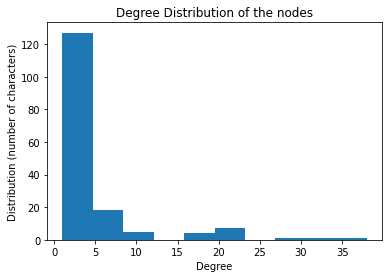

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Degree Distribution of the nodes')
plt.xlabel('Degree')
plt.ylabel('Distribution (number of characters)')
plt.hist(dist)
plt.show

**Step 6 [6 points]:** Another way to identify the influential/prominent nodes in a network is by computing the principal (leading) eigenvector of the weighted adjacency matrix. 

**(a)** Write an implementation of the power method to find the leading eigenvector of an input matrix. The function takes 3 input arguments: (1) an N x N matrix, (2) a randomly initialized vector, x0, of length N, and (3) maximum number of iterations. It will return an N-dimensional vector corresponding to the leading eigenvector of its input matrix.

In [ ]:
def power_method(matrix, x0, maxiter):
    """
        This function takes as input an N x N matrix, an N-dimensional vector, and a maximum iteration threshold and returns
        leading eigenvector (i.e., eigenvector corresponding to the largest eigenvalue) of the input matrix. The pseudocode
        of the power method is given in the lecture notes.
    """
    #as per the pseudocode in lec notes
    for _ in range(maxiter):
        x0 = np.matmul(matrix,x0)
        x0 = x0 / np.linalg.norm(x0)
    return x0


**(b)** Identify the character names and row ID of the nodes (in the nodes DataFrame) with top-10 highest absolute values in its leading eigenvector. Set the initial vector x0 to be a numpy array of 1s and maxiter to be 200.

In [ ]:
adj = getAdjacency(nodes, edges, 'adjmatrix.csv')
adjmatrix = np.array(adj)
x0 = np.ones(len(adjmatrix))

eig = power_method(adjmatrix, x0, 200).reshape(1,-1)

idx = np.argsort(eig).reshape(-1)
idx = np.flip(idx)

print('Nodes with top-10 highest values for the leading eigenvector:')
for i in range(10):
    print(i, " : ", nodes.iloc[idx[i]]["Name"], ' ( ID =' , idx[i],')', ' eigenvector =', eig[0][idx[i]])

Nodes with top-10 highest values for the leading eigenvector:
0 : Tyrion-Lannister ( ID = 151 ) eigenvector = 0.3995862922796272
1 : Cersei-Lannister ( ID = 28 ) eigenvector = 0.37540608703087025
2 : Joffrey-Baratheon ( ID = 74 ) eigenvector = 0.3588882712305501
3 : Robert-Baratheon ( ID = 128 ) eigenvector = 0.29569250110529577
4 : Eddard-Stark ( ID = 44 ) eigenvector = 0.29500615157000337
5 : Sansa-Stark ( ID = 135 ) eigenvector = 0.2826754886381859
6 : Jaime-Lannister ( ID = 65 ) eigenvector = 0.21600323756724593
7 : Robb-Stark ( ID = 126 ) eigenvector = 0.16957074407617706
8 : Catelyn-Stark ( ID = 27 ) eigenvector = 0.16251518945654236
9 : Jon-Snow ( ID = 78 ) eigenvector = 0.15716695472330117


**(c)** Plot a histogram of the distribution of the values associated with the principal eigenvector of the adjacency matrix.

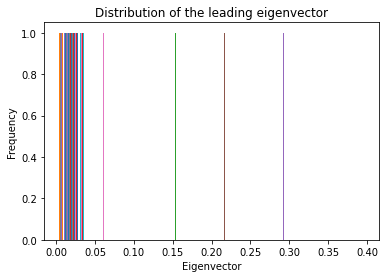

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Distribution of the leading eigenvector')
plt.ylabel("Frequency")
plt.xlabel("Eigenvector")
plt.hist(eig)
plt.show() 

## D. DATA MODELING AND ANALYSIS

In this step, you will write code to perform community detection (clustering) and link prediction (classification) on the network data.

**Step 7 [13 points]:** The community detection algorithm to be implemented is based on the Walktrap algorithm developed by Pots and Latapy. You can download the paper describing the algorithm from https://www-complexnetworks.lip6.fr/~latapy/Publis/communities.pdf. For this code, you will need the weight of the edges to compute a transition probability matrix, P, between the nodes in the network. Let $\mathbf{A}$ be the weighted adjacency matrix created in Step 4 above. The Walktrap algorithm will  convert the weighted adjacency matrix into a distance matrix $\mathbf{D}$ and then apply an agglomerative hierarchical clustering algorithm to find the clusters in the data. 

The algorithm consists of the following steps:
- Convert the weighted adjacency matrix into an initial transition probability matrix, $\mathbf{P}^{(0)}$, where
$$P^{(0)}_{ij} = \frac{A_{ij}}{\sum_k A_{ik}}$$
For example, if $$\mathbf{A} = \begin{bmatrix} 0 & 2 & 3 \\ 2 & 0 & 4\\ 3 & 4 & 0\\ \end{bmatrix}$$
then $$\mathbf{P}^{(0)} = \begin{bmatrix} 0 & 2/5 & 3/5 \\ 2/6 & 0 & 4/6\\ 3/7 & 4/7 & 0\\ \end{bmatrix}$$

- Apply random walk up to some maximum number of steps (numSteps) and compute the probability that a walk starting from node i will end up in node j after numSteps. The probability can be computed by multiplying the matrix P with itself up to (numSteps - 1) times.
$$\mathbf{P} = \prod_{i=1}^{numSteps} \mathbf{P}^{(0)} =  \mathbf{P}^{(0)} \times \mathbf{P}^{(0)}\times \cdots \times \mathbf{P}^{(0)} \ \ \ (\textrm{numSteps times})$$

- Compute the distance matrix $\mathbf{D}$ between the nodes using the formula given below:
$$D_{ij} = \sqrt{\sum_{k} \frac{(P_{ik} - P_{jk})^2}{d_{k}}}$$
where $d_k = \sum_j A_{kj}$, i.e., sum of the weights of the outgoing edges of node $k$.

- Apply the group average agglomerative hierarchical clustering algorithm to the matrix $\mathbf{D}$ to obtain the final $k$ clusters. **Note:** The original paper uses Ward's agglomerative hierarchical clustering algorithm instead of the group average
method. Since scikit-learn prohibits the use of precomputed distance matrix for Ward's algorithm, you should use the group average method instead.

Set the number of clusters to be 5 and display the character names of the nodes belonging to each cluster. To do this, you must first load the character names from the nodes DataFrame object and save it in a numpy array named nodeLabels.   

**(a)** Write the implementation of your code below. You may use scikit-learn implementation of the agglomerative hierarchical clustering for this question. Set the number of clusters to be 5 and numSteps to be 5. Also, make sure you use set the option affinity='precomputed' and linkage='average' when calling the AgglomerativeClustering() constructor function. For more information about how to invoke the agglomerative hierachical clustering function, check the documentation available at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import math

nodeLabels = nodes["Name"]

class community_detection():
    """
    Implementation of community detection algorithm
    """
    def __init__(self, adjmatrix, nodeLabels, numClusters = 5, numSteps = 16):
        """ 
            In this function, you need to store the adjmatrix, numClusters, node labels, and number of steps 
            into 4 private variables: self.adjmatrix, self.nodelabels, self.numClusters, and self.numSteps.
        """
        self.adjmatrix = adjmatrix
        self.nodeLabels = nodeLabels
        self.numClusters = numClusters
        self.numSteps = numSteps
 
    def computeDist(self):
        """ 
            This function will compute an N x N distance matrix using the Walktrap algorithm. The function must
            implement the following steps
           1. Compute the initial transition probability matrix P0. 
           2. Compute the final transition probability matrix by multiplying P0 with itself for (numSteps-1) times.
           3. Compute the distance matrix D using the formula shown above.
           4. Return the N x N distance matrix as its output. 
        """
        
        P0 = np.copy(self.adjmatrix)
        for i in range(len(P0)):
            res = np.sum(P0[i])
            for k in range(len(P0[i])):
                P0[i][k] /= res #initial transition probability matrix

        for i in range(self.numSteps):
            P0 = np.matmul(P0,P0) #final transition probability matrix
        
        dm = np.empty(self.adjmatrix.shape)
        for i in range(len(dm)):
            for j in range(len(dm[i])):
                fin = 0
                for k in range(len(self.adjmatrix)):
                    d_k = sum(self.adjmatrix[k])
                    fin += (P0[i][k]-P0[j][k])**2 / d_k
                dm[i][j] = math.sqrt(fin) # #distance matrix
                    
        return dm;
            
    def fit(self, random_state=1):
        """
            This function will create clusters from the input network by performing the following steps:
            1. Invoke the computeDist() function to compute the distance matrix D.
            2. Apply scikit-learn agglomerative hierarchical clustering algorithm on the precomputed distance 
            matrix D to obtain the clusters (communities). Make sure you use the group average method. 
            3. Identify the names of the characters (nodes) associated with each cluster (community).
            4. Return the cluster assignment vector as its output. 
        """
        CompDist = self.computeDist()
        AggC = AgglomerativeClustering(n_clusters=self.numClusters, affinity='precomputed', linkage='average').fit(CompDist)

        comm0, comm1, comm2, comm3, comm4 = [],[],[],[],[]

        #to mathc the colour scheme
        for i in range(len(AggC.labels_)):
            l = AggC.labels_[i]
            if(l == 0):
                comm0.append(nodeLabels[i])
            if(l == 1):
                comm1.append(nodeLabels[i])
            if(l == 2):
                comm2.append(nodeLabels[i])
            if(l == 3):
                comm3.append(nodeLabels[i])
            if(l == 4):
                comm4.append(nodeLabels[i])

        print('Community detection results:')
        print('Community 0:', comm0)
        print('Community 1:', comm1)
        print('Community 2:', comm2)
        print('Community 3:', comm3)
        print('Community 4:', comm4)

        self.clusterassignment = AggC.labels_
        return [comm0,comm1,comm2,comm3,comm4]

**(b)** Display the nodes in each community.

In [ ]:
comm = community_detection(adjmatrix, nodeLabels, numClusters = 5, numSteps = 5).fit()

Community detection results:
Community 0: ['Barristan-Selmy', 'Illyrio-Mopatis', 'Rhaegar-Targaryen']
Community 1: ['Aegon-Targaryen-(son-of-Rhaegar)', 'Aemon-Targaryen-(Maester-Aemon)', 'Aerys-II-Targaryen', 'Alliser-Thorne', 'Anguy', 'Arya-Stark', 'Arys-Oakheart', 'Axell-Florent', 'Benjen-Stark', 'Beric-Dondarrion', 'Boros-Blount', 'Bowen-Marsh', 'Bran-Stark', 'Brienne-of-Tarth', 'Bronn', 'Brynden-Tully', 'Catelyn-Stark', 'Cersei-Lannister', 'Cleos-Frey', 'Clydas', 'Craster', 'Cressen', 'Dareon', 'Davos-Seaworth', 'Devan-Seaworth', 'Dick-Crabb', 'Donal-Noye', 'Dontos-Hollard', 'Dunsen', 'Eddard-Stark', 'Eddison-Tollett', 'Edmure-Tully', 'Gendry', 'Gilly', 'Gregor-Clegane', 'Grenn', 'Gyles-Rosby', 'Halder', 'Haldon', 'High-Sparrow', 'Hodor', 'Hoster-Tully', 'Hot-Pie', 'Ilyn-Payne', 'Jaime-Lannister', 'Janos-Slynt', 'Jaqen-Hghar', 'Jarl', 'Jeor-Mormont', 'Jeyne-Poole', 'Jeyne-Westerling', 'Joffrey-Baratheon', 'Jojen-Reed', 'Jon-Arryn', 'Jon-Connington', 'Jon-Snow', 'Jon-Umber-(Greatjon

**(c)** Visualize the network and its communities. Use the color scheme given below to represent nodes that belong to cluster 0, 1, 2, 3, and 4.

In [ ]:
import networkx as nx

nx_graph = nx.from_pandas_edgelist(edges, source='Source', target='Target', create_using=None, edge_key=None)
colors = ['red', 'green', 'blue', 'yellow', 'cyan']   # color schema for the nodes (to represent cluster assignment)
mp = []

#Using the color scheme given below to represent nodes that belong to cluster 0, 1, 2, 3, and 4.
for name in nx_graph:
    if name in comm[0]:
        mp.append('red')
    if name in comm[1]:
        mp.append('green')
    if name in comm[2]:
        mp.append('blue')
    if name in comm[3]:
        mp.append('yellow')
    if name in comm[4]:
        mp.append('cyan')

plt.figure(figsize=(100,100))
nx.draw(nx_graph, node_color=mp, with_labels=True, node_size=1500, font_size=24)
plt.show()